# Bike System Data
## by (Dalal AlAli)

## Investigation Overview
My goal is To Investigate 2017 ford bikes dataset and figure the relationships between the variables.
## Dataset Overview
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load Ford GoBike dataset file 
bike = pd.read_excel('2017-fordgobike-tripdata.xlsx')

In [3]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike.end_time = pd.to_datetime(bike.end_time)
bike.start_station_id = bike.start_station_id.astype(str)
bike.end_station_id = bike.end_station_id.astype(str)
bike.bike_id = bike.bike_id.astype(str)
bike.user_type = bike.user_type.astype('category')

In [4]:
# extract start time month name
bike['start_time_month_name']=bike['start_time'].dt.strftime('%B')

In [5]:
# extract start time weekdays
bike['start_time_weekday']=bike['start_time'].dt.strftime('%a')

In [6]:
# extract start time day
bike['start_time_day']=bike['start_time'].dt.day.astype(int)

In [7]:
# extract start time hour
bike['start_time_hour']=bike['start_time'].dt.hour

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1): Number of trip in diffrent Days
From the figure i found that the weekdays have more trips than weekends.

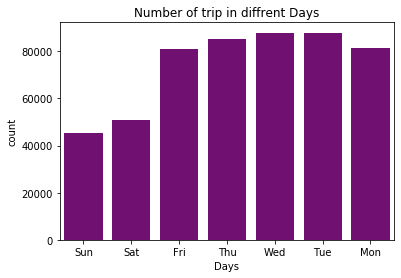

In [8]:
sb.countplot(data=bike, x='start_time_weekday',color='purple');
plt.xlabel('Days')
plt.title('Number of trip in diffrent Days');

## (Visualization 2): Duration in seconds

From the figure i found that we have seen above that most of the duration were on 400 - 600 second.

Text(0.5, 0, 'Duration in seconds')

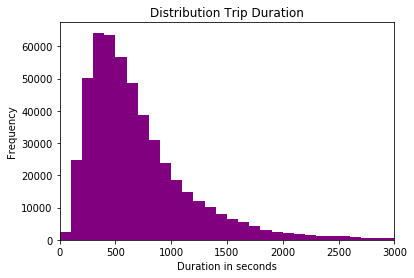

In [9]:
edges = np.arange(0, bike['duration_sec'].max()+100, 100)
plt.hist(data = bike, x = 'duration_sec', bins = edges,color='purple')
plt.xlim(0,3000)
plt.title('Distribution Trip Duration')
plt.ylabel('Frequency');
plt.xlabel('Duration in seconds')

## (Visualization 3): Monthly Bike Trips

From the figure i found that October has the highest number of trips,on the other hand,june has the lowest number of trips.

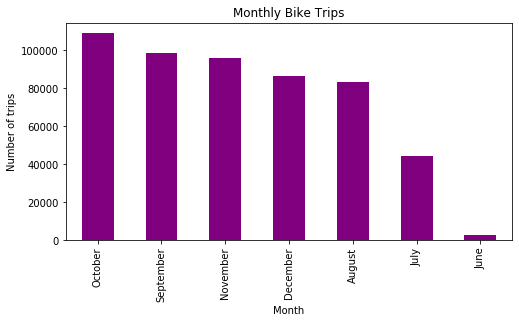

In [10]:
x=bike.start_time_month_name.value_counts().plot(kind='bar',figsize=(8,4),color='purple' ,title='Monthly Bike Trips');
x.set_xlabel("Month",fontsize=10);
x.set_ylabel("Number of trips",fontsize=10);

# (Visualization 4):The Relation between User type and Duration
From the figure i found that customers has longest duration,on the other hand,subscriber has low duration.

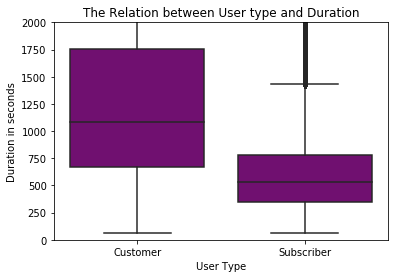

In [11]:
sb.boxplot(data = bike, x = 'user_type', y = 'duration_sec', color='purple') 
plt.ylim([0, 2000])
plt.title('The Relation between User type and Duration')
plt.xlabel('User Type')
plt.ylabel('Duration in seconds')
plt.show()

# (Visualization 5) : The relationship between user type and weekdays
From the figure i found that on weekends the customer and subscribe heve too much lower bike trips as the weekdays.

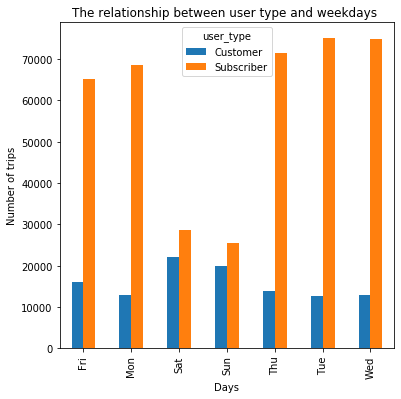

In [12]:
x = pd.crosstab(bike['start_time_weekday'], bike['user_type']).plot(kind='bar', stacked=False,title='The relationship between user type and weekdays ',figsize=(6,6));
x.set_xlabel("Days",fontsize=10);
x.set_ylabel("Number of trips",fontsize=10);

In [13]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 359608 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\lenovo\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
 